In [1]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
##fjson = 'raw_tweet_data_200.json'
fjson = 'raw_tweet_data_10000.json'

In [3]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

7502

In [4]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'id': '1551706020946247681',
 'text': 'RT @AoifeMFoley: I’m trying to get back in shape #menopausebelly so I cycled today from Fountainstown to Boreenmanna Road. It’ll take a wee…',
 'created_at': '2022-07-25T23:08:39.000Z',
 'public_metrics': {'retweet_count': 1,
  'reply_count': 0,
  'like_count': 0,
  'quote_count': 0},
 'author_id': '146796954'}

In [5]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['text'] for t in data], columns=['text'])
df_tweets

,text
0,RT @AoifeMFoley: I’m trying to get back in sha...
1,BtrPower LiFePo4 Battery - 48V Ebike Battery 2...
2,"HITTROAD Electric Bike, 3 Hours Fast Charge, 3..."
3,Every #ebike #emotorcycle and #eenduro we sell...
4,ZUZULI Bicycle Mudguard 20inch E-Bike Fat Tire...
...,...
7497,RT @medmapper: @wanderingdave @MRC_SLC Me too ...
7498,RT @medmapper: @wanderingdave @MRC_SLC Me too ...
7499,"@batonflipper Incidentally, there is also a pi..."
7500,RT @RadPowerBikes: Get the ebike Rolling Stone...


In [6]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['public_metrics']['retweet_count'] for t in data]
df_tweets['favorites'] = [t['public_metrics']['like_count'] for t in data]
df_tweets['user'] = [t['author_id'] for t in data]
df_tweets

,text,retweets,favorites,user
0,RT @AoifeMFoley: I’m trying to get back in sha...,1,0,146796954
1,BtrPower LiFePo4 Battery - 48V Ebike Battery 2...,0,0,1544220832049668099
2,"HITTROAD Electric Bike, 3 Hours Fast Charge, 3...",0,0,1535437605147394051
3,Every #ebike #emotorcycle and #eenduro we sell...,0,0,1434023642447286273
4,ZUZULI Bicycle Mudguard 20inch E-Bike Fat Tire...,0,0,1550033693720338433
...,...,...,...,...
7497,RT @medmapper: @wanderingdave @MRC_SLC Me too ...,2,0,788098
7498,RT @medmapper: @wanderingdave @MRC_SLC Me too ...,2,0,208711400
7499,"@batonflipper Incidentally, there is also a pi...",0,0,917704985252630529
7500,RT @RadPowerBikes: Get the ebike Rolling Stone...,17,0,1195923897109139456


In [7]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [8]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,RT @AoifeMFoley: I’m trying to get back in sha...,1,0,146796954,rt aoifemfoley im trying get back shape menopa...
1,BtrPower LiFePo4 Battery - 48V Ebike Battery 2...,0,0,1544220832049668099,btrpower lifepo4 battery 48v ebike battery 20a...
2,"HITTROAD Electric Bike, 3 Hours Fast Charge, 3...",0,0,1535437605147394051,hittroad electric bike 3 hours fast charge 350...
3,Every #ebike #emotorcycle and #eenduro we sell...,0,0,1434023642447286273,every ebike emotorcycle eenduro sell average l...
4,ZUZULI Bicycle Mudguard 20inch E-Bike Fat Tire...,0,0,1550033693720338433,zuzuli bicycle mudguard 20inch fat tire fender...
...,...,...,...,...,...
7497,RT @medmapper: @wanderingdave @MRC_SLC Me too ...,2,0,788098,rt medmapper wanderingdave rode lime ebike rea...
7498,RT @medmapper: @wanderingdave @MRC_SLC Me too ...,2,0,208711400,rt medmapper wanderingdave rode lime ebike rea...
7499,"@batonflipper Incidentally, there is also a pi...",0,0,917704985252630529,batonflipper incidentally also pianist boasts ...
7500,RT @RadPowerBikes: Get the ebike Rolling Stone...,17,0,1195923897109139456,rt radpowerbikes get ebike rolling stone calls...


In [9]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,RT @AoifeMFoley: I’m trying to get back in sha...,1,0,146796954,rt aoifemfoley im trying get back shape menopa...,0.000000,0.000000
1,BtrPower LiFePo4 Battery - 48V Ebike Battery 2...,0,0,1544220832049668099,btrpower lifepo4 battery 48v ebike battery 20a...,0.000000,0.000000
2,"HITTROAD Electric Bike, 3 Hours Fast Charge, 3...",0,0,1535437605147394051,hittroad electric bike 3 hours fast charge 350...,0.200000,0.600000
3,Every #ebike #emotorcycle and #eenduro we sell...,0,0,1434023642447286273,every ebike emotorcycle eenduro sell average l...,-0.158333,0.233333
4,ZUZULI Bicycle Mudguard 20inch E-Bike Fat Tire...,0,0,1550033693720338433,zuzuli bicycle mudguard 20inch fat tire fender...,0.000000,0.000000
...,...,...,...,...,...,...,...
7497,RT @medmapper: @wanderingdave @MRC_SLC Me too ...,2,0,788098,rt medmapper wanderingdave rode lime ebike rea...,0.207143,0.385714
7498,RT @medmapper: @wanderingdave @MRC_SLC Me too ...,2,0,208711400,rt medmapper wanderingdave rode lime ebike rea...,0.207143,0.385714
7499,"@batonflipper Incidentally, there is also a pi...",0,0,917704985252630529,batonflipper incidentally also pianist boasts ...,-0.450000,0.575000
7500,RT @RadPowerBikes: Get the ebike Rolling Stone...,17,0,1195923897109139456,rt radpowerbikes get ebike rolling stone calls...,0.000000,0.150000


In [10]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['bosch', 'yamaha', 'shimano', 'trek', 'rad', 'aventon', 'specialized']

In [11]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,bosch
1,yamaha
2,shimano
3,trek
4,rad
5,aventon
6,specialized


In [12]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("bosch")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
22,RT @BoschGlobal: 🏙️🚴‍♀️ At last week's @EUROBI...,40,0,1443121683284496384,rt boschglobal last week presented new ebike a...,0.045455,0.473737
24,RT @BoschGlobal: 🏙️🚴‍♀️ At last week's @EUROBI...,40,0,1478401968553046018,rt boschglobal last week presented new ebike a...,0.045455,0.473737
161,Die 2. Generation des #eBike ABS von Bosch eBi...,0,0,384744271,die generation des ebike abs von bosch ebike s...,0.000000,0.000000
198,RT @BoschGlobal: 🚵 Whether you're a beginner o...,56,0,1456983067848019976,rt boschglobal whether beginner experienced mo...,0.400000,0.475000
216,RT @WeelzFr: La division #veloelectrique du gé...,3,0,978975154444406785,rt weelzfr la division veloelectrique du gant ...,0.000000,0.000000
...,...,...,...,...,...,...,...
7126,Title: Bosch eBike Systems presents its new eB...,0,0,1158034178518245376,title bosch ebike systems presents new ebike a...,0.093182,0.663636
7127,RT @hn_frontpage: Bosch eBike Systems presents...,1,0,1158034178518245376,rt bosch ebike systems presents new ebike abs l c,0.136364,0.454545
7128,Bosch eBike Systems presents its new eBike ABS...,1,0,4617024083,bosch ebike systems presents new ebike abs l c,0.136364,0.454545
7134,RT @BoscheBikeUS: New from Bosch! https://t.co...,1,0,1607637350,rt boschebikeus new bosch video summarizes lat...,0.318182,0.677273


In [13]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [14]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,bosch,0.168118
1,yamaha,0.000000
2,shimano,0.048450
3,trek,0.230100
4,rad,0.067472
5,aventon,0.033541
6,specialized,-0.018252


In [15]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1320,RT @BrentToderian: The best electric vehicle i...,456,0,15325213,rt brenttoderian best electric vehicle electri...,1.0,0.3
4848,RT @BrentToderian: The best electric vehicle i...,456,0,1147201,rt brenttoderian best electric vehicle electri...,1.0,0.3
4851,RT @BrentToderian: The best electric vehicle i...,456,0,76961493,rt brenttoderian best electric vehicle electri...,1.0,0.3
4689,😉A very impressive point for an #ebike like #M...,0,1,1524276226889637888,impressive point ebike like mokwheel mok consi...,1.0,1.0
895,Has anyone been here to see the waterfall?☀️🚲🥰...,0,2,1192267845624709122,anyone see waterfall impressive aostirmotor eb...,1.0,1.0
4850,RT @BrentToderian: The best electric vehicle i...,456,0,40322305,rt brenttoderian best electric vehicle electri...,1.0,0.3
1104,RT @BrentToderian: The best electric vehicle i...,456,0,1350978772309258240,rt brenttoderian best electric vehicle electri...,1.0,0.3
2072,RT @BrentToderian: The best electric vehicle i...,456,0,1308533379659427840,rt brenttoderian best electric vehicle electri...,1.0,0.3
1592,RT @BrentToderian: The best electric vehicle i...,456,0,260849088,rt brenttoderian best electric vehicle electri...,1.0,0.3
1256,RT @BrentToderian: The best electric vehicle i...,456,0,49198720,rt brenttoderian best electric vehicle electri...,1.0,0.3


In [16]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1561,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,4363861817,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
2016,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,1230014118,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
1923,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,15147906,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
1924,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,35323010,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
1929,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,28267266,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
1930,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,389468789,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
1931,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,48059505,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
2189,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,815223430979223552,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
1676,"RT @Nerd4Cities: Guy who drives a $70,000 pick...",2568,0,34639127,rt nerd4cities guy drives pickup truck thinks ...,0.0,0.0
2061,RT @Kyukimasa: 空気入れて膨らませて乗る折り畳みEVバイク「Poimo」(東京...,2430,0,297883759,rt kyukimasa evpoimo,0.0,0.0


In [17]:
# users producing most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)['user']
## look up user details with userid:
## https://twitter.com/i/user/{usrid}

1561            4363861817
2016            1230014118
1923              15147906
1924              35323010
1929              28267266
1930             389468789
1931              48059505
2189    815223430979223552
1676              34639127
2061             297883759
Name: user, dtype: object

In [18]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

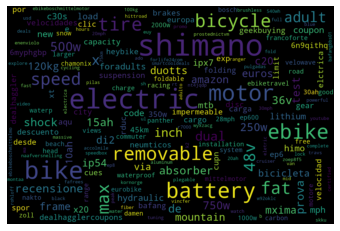

In [19]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'shimano'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()